In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/clean_data.csv")
df.head()


,[run number],number-people,ticks,injury-count,count people,count people with [pressure >= 30]
0,1,250,0,0,250,0
1,1,250,1,0,250,0
2,1,250,2,0,249,0
3,1,250,3,0,247,0
4,1,250,4,0,247,0


In [ ]:
# Basic info
print(df.info())

# Summary statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101552 entries, 0 to 101551
Data columns (total 6 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   [run number]                        101552 non-null  int64
 1   number-people                       101552 non-null  int64
 2   ticks                               101552 non-null  int64
 3   injury-count                        101552 non-null  int64
 4   count people                        101552 non-null  int64
 5   count people with [pressure >= 30]  101552 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB
None


,count,mean,std,min,25%,50%,75%,max
[run number],101552.0,136.463231,55.686175,1.0,96.0,146.0,184.0,216.0
number-people,101552.0,1069.274854,379.688089,250.0,750.0,1250.0,1500.0,1500.0
ticks,101552.0,284.388678,198.658560,0.0,117.0,251.0,425.0,868.0
injury-count,101552.0,99.818241,72.378672,0.0,38.0,92.0,156.0,241.0
count people,101552.0,199.208937,267.156443,0.0,37.0,89.0,250.0,1500.0
count people with [pressure >= 30],101552.0,21.048310,29.434887,0.0,0.0,2.0,38.0,142.0


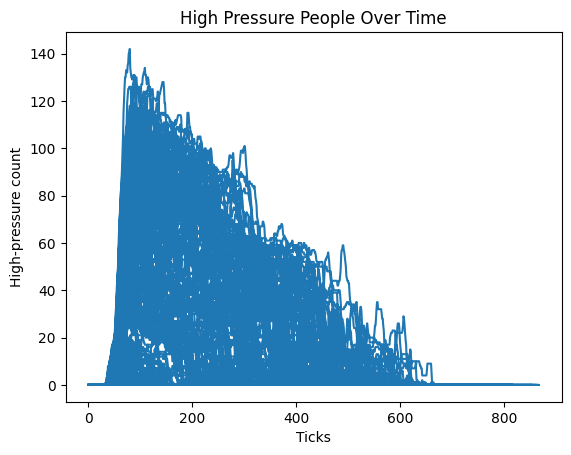

In [ ]:
plt.plot(df["ticks"], df["count people with [pressure >= 30]"])
plt.xlabel("Ticks")
plt.ylabel("High-pressure count")
plt.title("High Pressure People Over Time")
plt.show()


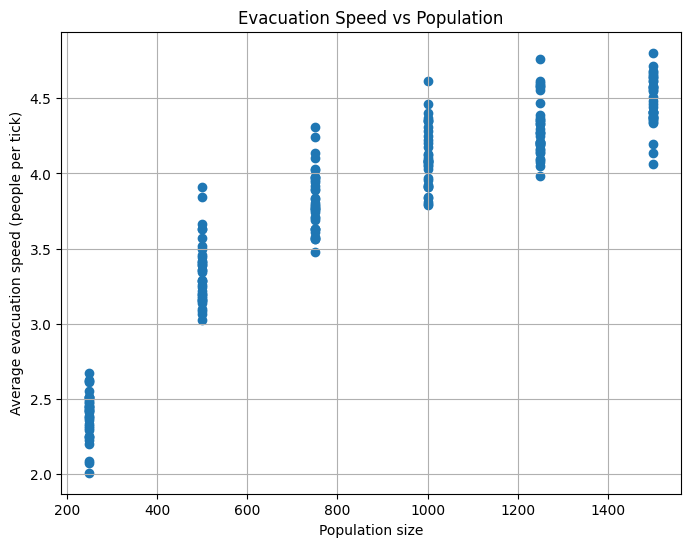

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load data ---
df = pd.read_csv("/content/clean_data.csv")   # Update path if needed

# --- Clean column names (optional but useful) ---
df.columns = [c.strip().replace("[","").replace("]","") for c in df.columns]

# After cleaning, run-number column is now called: run number
# Numeric fields may also need cleaning depending on your CSV.


# --- Compute evacuated people ---
df["evacuated"] = df["number-people"] - df["count people"]

# --- Compute evacuation speed ---
df["evac_speed"] = df["evacuated"] / df["ticks"].replace(0, np.nan)

# --- Compute averages per run ---
speed_per_run = df.groupby("run number")["evac_speed"].mean()
population_per_run = df.groupby("run number")["number-people"].max()

plot_df = pd.DataFrame({
    "population": population_per_run,
    "avg_speed": speed_per_run
}).reset_index()

# --- Plot evacuation speed vs population ---
plt.figure(figsize=(8,6))
plt.scatter(plot_df["population"], plot_df["avg_speed"])
plt.xlabel("Population size")
plt.ylabel("Average evacuation speed (people per tick)")
plt.title("Evacuation Speed vs Population")
plt.grid(True)
plt.show()


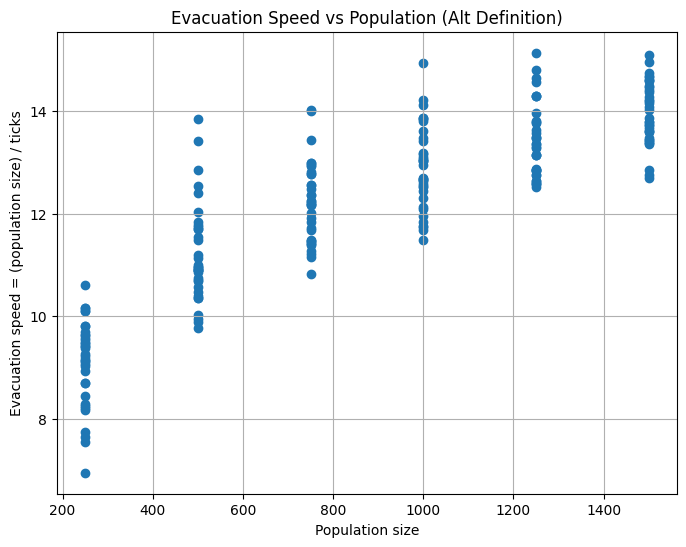

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/clean_data.csv")

df.columns = [c.strip().replace("[","").replace("]","") for c in df.columns]

# evacuation speed = (population size) / ticks
df["evac_speed_alt"] = df["number-people"] / df["ticks"].replace(0, np.nan)

speed_per_run = df.groupby("run number")["evac_speed_alt"].mean()
population_per_run = df.groupby("run number")["number-people"].max()

# Prepare data for plotting
plot_df = pd.DataFrame({
    "population": population_per_run,
    "avg_speed_alt": speed_per_run
}).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(plot_df["population"], plot_df["avg_speed_alt"])
plt.xlabel("Population size")
plt.ylabel("Evacuation speed = (population size) / ticks")
plt.title("Evacuation Speed vs Population (Alt Definition)")
plt.grid(True)
plt.show()


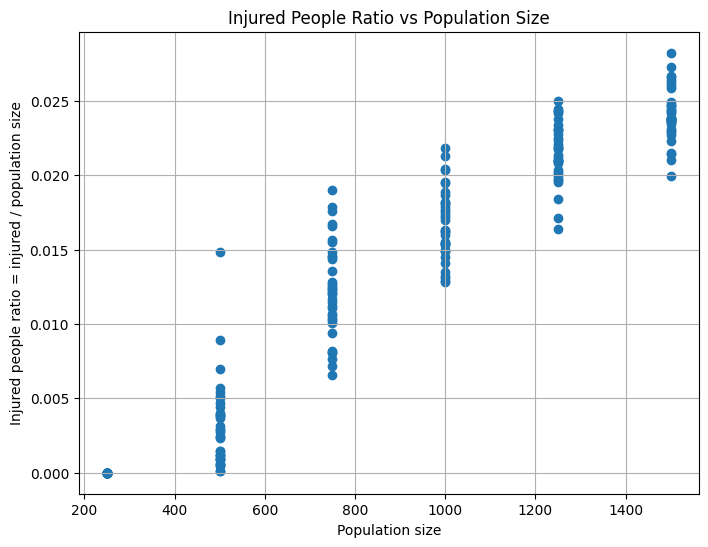

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/clean_data.csv")

df.columns = [c.strip().replace("[","").replace("]","") for c in df.columns]

injured_col = None
for c in df.columns:
    if "pressure >= 30" in c.lower():
        injured_col = c
        break

if injured_col is None:
    raise ValueError("Could not find injured-people column. Run: df.columns")

df["injured_ratio"] = df[injured_col] / df["number-people"].replace(0, np.nan)

injured_per_run = df.groupby("run number")["injured_ratio"].mean()
population_per_run = df.groupby("run number")["number-people"].max()

# Prepare data for plotting
plot_df = pd.DataFrame({
    "population": population_per_run,
    "avg_injured_ratio": injured_per_run
}).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(plot_df["population"], plot_df["avg_injured_ratio"])
plt.xlabel("Population size")
plt.ylabel("Injured people ratio = injured / population size")
plt.title("Injured People Ratio vs Population Size")
plt.grid(True)
plt.show()


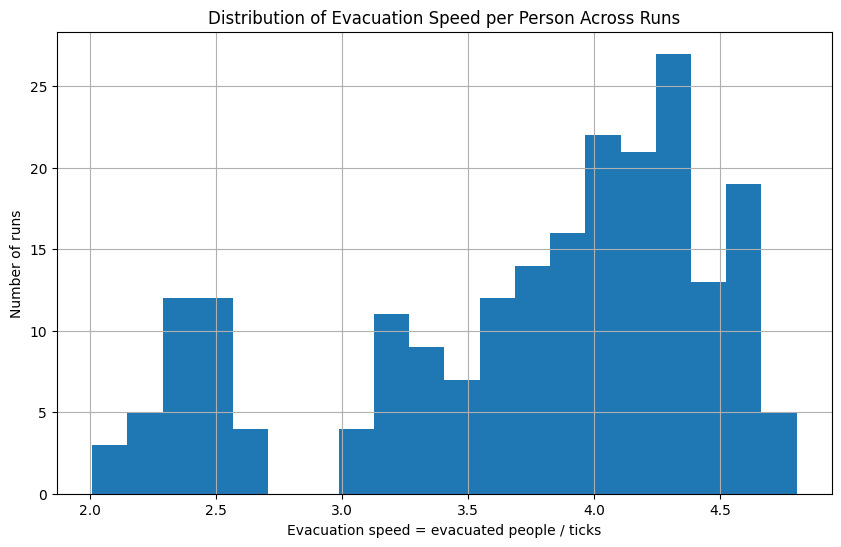

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/clean_data.csv")   # update path if needed

df.columns = [c.strip().replace("[","").replace("]","") for c in df.columns]

df["evacuated"] = df["number-people"] - df["count people"]

df["evac_speed"] = df["evacuated"] / df["ticks"].replace(0, np.nan)

# ---- Average evacuation speed per run ----
speed_per_run = df.groupby("run number")["evac_speed"].mean().dropna()

# ---- Plot histogram ----
plt.figure(figsize=(10,6))
plt.hist(speed_per_run, bins=20)
plt.xlabel("Evacuation speed = evacuated people / ticks")
plt.ylabel("Number of runs")
plt.title("Distribution of Evacuation Speed per Person Across Runs")
plt.grid(True)
plt.show()
